In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.decomposition import PCA

In [3]:
x = np.empty((100, 2))
x[:, 0] = np.random.uniform(0, 100, size=100)
x[:, 1] = 0.75 * x[:, 0] + 3 + np.random.normal(0, 10, size=100)
x.shape

(100, 2)

In [4]:
pca = PCA(n_components=1).fit(x)

In [5]:
pca.components_

array([[0.78726508, 0.6166147 ]])

In [6]:
x_reduction = pca.transform(x)
x_reduction.shape

(100, 1)

In [7]:
x_restore = pca.inverse_transform(x_reduction)
x_restore.shape

(100, 2)

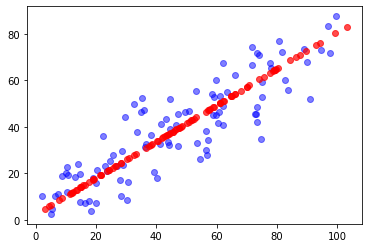

In [8]:
plt.scatter(x[:, 0], x[:, 1], color='b', alpha=0.5)
plt.scatter(x_restore[:, 0], x_restore[:, 1], color='r', alpha=0.7)

In [9]:
from sklearn.datasets import load_boston

In [10]:
boston = load_boston()
x = boston.data
x.shape

(506, 13)

In [11]:
pca = PCA(n_components=3).fit(x)

In [12]:
pca.components_

array([[ 2.92973218e-02, -4.35898000e-02,  2.83309382e-02,
        -5.55846350e-05,  4.49721818e-04, -1.16815860e-03,
         8.36335746e-02, -6.56163360e-03,  4.50053753e-02,
         9.49741169e-01,  5.60011721e-03, -2.91218514e-01,
         2.29433756e-02],
       [ 6.66847277e-03,  1.17564821e-03, -4.94975624e-03,
        -1.02678850e-04,  1.82069867e-06,  3.65750108e-04,
        -5.72246652e-03,  3.53685109e-04, -8.61865948e-03,
        -2.92406308e-01, -2.52898538e-03, -9.56180551e-01,
         5.76719865e-03],
       [-1.14793645e-02,  6.32897481e-01, -8.83403603e-02,
        -9.75320360e-04, -1.80720215e-03,  4.73397110e-03,
        -7.55863075e-01,  4.50884160e-02,  2.84787088e-03,
         9.38644477e-02, -1.11592649e-02, -2.35628231e-02,
        -9.28333004e-02]])

In [13]:
x_reduction = pca.transform(x)
x_reduction.shape

(506, 3)

In [14]:
x_restore = pca.inverse_transform(x_reduction)
x_restore.shape

(506, 13)

In [15]:
digits = sklearn.datasets.load_digits()
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(digits.data, digits.target)

In [16]:
x_train.shape

(1347, 64)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
%time knn = KNeighborsClassifier().fit(x_train, y_train)
knn.score(x_test, y_test)

Wall time: 22 ms


0.9933333333333333

In [19]:
pca = PCA(n_components=2).fit(x_train)
x_train_reduction = pca.transform(x_train)
x_test_reduction = pca.transform(x_test)

%time knn = KNeighborsClassifier().fit(x_train_reduction, y_train)
knn.score(x_test_reduction, y_test)

Wall time: 995 µs


0.6088888888888889

## 保留的可解释的原数据的方差(越大越好)

In [20]:
pca.explained_variance_ratio_

array([0.15397146, 0.13374017])

In [21]:
pca = PCA(n_components=x_train.shape[1]).fit(x_train)
pca.explained_variance_ratio_

array([1.53971463e-01, 1.33740165e-01, 1.17549426e-01, 8.09945569e-02,
       5.94569073e-02, 4.98566557e-02, 4.21482428e-02, 3.68678261e-02,
       3.40716966e-02, 2.97372229e-02, 2.36158414e-02, 2.23841633e-02,
       1.85342458e-02, 1.70854491e-02, 1.51511749e-02, 1.39259838e-02,
       1.33358259e-02, 1.24669690e-02, 1.02794751e-02, 9.11968834e-03,
       8.84130300e-03, 7.99271456e-03, 7.71370686e-03, 7.16520006e-03,
       7.01598070e-03, 6.06997486e-03, 5.70731839e-03, 5.30756964e-03,
       4.87441099e-03, 4.24113564e-03, 3.79706561e-03, 3.54550001e-03,
       3.31920483e-03, 3.21174581e-03, 3.06631591e-03, 2.90466999e-03,
       2.54346299e-03, 2.27364266e-03, 2.23703460e-03, 2.07126440e-03,
       1.89942517e-03, 1.63663281e-03, 1.52692863e-03, 1.40132880e-03,
       1.17287164e-03, 1.05783094e-03, 9.58762592e-04, 7.63703801e-04,
       5.24603059e-04, 4.18122728e-04, 2.34804511e-04, 8.08658807e-05,
       5.96942492e-05, 4.57312134e-05, 8.84023244e-06, 7.41497122e-06,
      

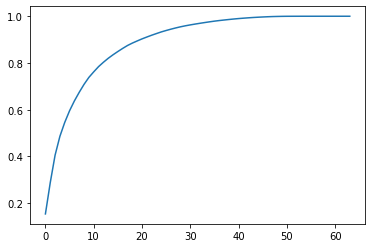

In [22]:
plt.plot([i for i in range(x_train.shape[1])], 
         [np.sum(pca.explained_variance_ratio_[:i + 1]) for i in range(x_train.shape[1])])

In [23]:
pca = PCA(0.95).fit(x_train)
x_train_reduction = pca.transform(x_train)
x_test_reduction = pca.transform(x_test)

%time knn = KNeighborsClassifier().fit(x_train_reduction, y_train)
knn.score(x_test_reduction, y_test)

Wall time: 7 ms


0.9911111111111112

## MNIST

In [24]:
import numpy as np
from sklearn.datasets import fetch_openml

In [25]:
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [26]:
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

In [27]:
X, y = mnist['data'], mnist['target']

In [28]:
X_train = np.array(X[:60000], dtype=float)
y_train = np.array(y[:60000], dtype=float)
X_test = np.array(X[60000:], dtype=float)
y_test = np.array(y[60000:], dtype=float)
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [29]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [30]:
pca = PCA(0.9).fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)
X_train_reduction.shape

(60000, 87)

In [31]:
knn = KNeighborsClassifier().fit(X_train_reduction, y_train)

In [32]:
knn.score(X_test_reduction, y_test)

0.9728

## PCA降噪

## 特征脸

In [33]:
from sklearn.datasets import fetch_lfw_people

In [39]:
face = fetch_lfw_people(data_home='./')

URLError: <urlopen error EOF occurred in violation of protocol (_ssl.c:852)>

In [ ]:
face.keys()

In [ ]:
face.data.shape

In [ ]:
face.images.shape

In [ ]:
random_idx = np.random.permutation(len(face.data))
X = face.data(random_idx)

In [ ]:
face.target_names